In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
orders_qual = pd.read_csv('orders_qual.csv')
products_qual = pd.read_csv('products_qual.csv')
discount_categories_new_df = pd.read_csv('discount_categories_new_df.csv')
discount_categories_ref_df = pd.read_csv('discount_categories_ref_df.csv')
discounts_categories_df = pd.read_csv('discounts_categories_df.csv')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

orders_qual['created_date'] = pd.to_datetime(orders_qual['created_date'])
discounts_categories_df['date'] = pd.to_datetime(discounts_categories_df['date'])
discount_categories_new_df['date'] = pd.to_datetime(discount_categories_new_df['date'])

## All Products - Average Revenue per Week (total paid)

In [3]:
orders_qual_date = orders_qual.groupby(orders_qual['created_date'].dt.to_period('W'))['total_paid'].mean().reset_index()

orders_qual_date['created_date'] = orders_qual_date['created_date'].dt.to_timestamp()

In [4]:
orders_qual_date.head(3)

,created_date,total_paid
0,2016-12-26,276.54
1,2017-01-02,197.20
2,2017-01-09,185.55


In [5]:
#sns.relplot(data=orders_qual_date, kind='line', x='created_date', y='total_paid', aspect=4);

## Distribution of Discounts

In [6]:
discounts_categories_df.head(3)

,id_order,date,sku,name,desc,type,unit_price,price,product_quantity,unit_price_total,discount,discount_percentage,price_group,discount_group,order_year,order_month,order_day,brand_name,category
0,241423,2017-11-06 12:47:20,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,11935397,129.16,139.99,1,129.16,10.83,8.00,-200.00,5-10,2017,11,6,LaCie,Hard Drives and Storage
1,242832,2017-12-31 17:26:40,PAR0074,Parrot 550mAh battery for MiniDrones,550mAh rechargeable battery for Parrot minidrones,11905404,10.77,17.99,1,10.77,7.22,40.00,-50.00,40-50,2017,12,31,Parrot,Accessories
2,243330,2017-02-15 17:07:44,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,8GB RAM Mac mini iMac MacBook and MacBook Pro ...,1364,77.99,99.99,1,77.99,22.00,22.00,-100.00,20-30,2017,2,15,OWC,Memory Upgrades


In [7]:
categories_discounts = discount_categories_new_df.groupby('category').agg({'discount':'sum', 'discount_percentage':'mean', 'unit_price_total':'sum'}).reset_index().nlargest(30, 'unit_price_total')

In [74]:
categories_discounts

,category,discount,discount_percentage,unit_price_total
8,Laptops,275359.47,11.85,2893815.28
3,Computers,391941.01,11.07,2881836.39
4,Hard Drives and Storage,309865.55,16.82,1886142.57
2,Cellular Phones,100882.30,21.48,1510557.61
15,Tablets,143738.45,18.67,982228.48
10,Monitors,123481.09,19.39,824068.17
11,Network Devices,63758.60,11.43,626514.45
16,Wearables and Smart Home,92946.07,19.04,530257.95
0,Accessories,98041.11,20.18,452239.16
9,Memory Upgrades,69260.58,14.12,412753.07


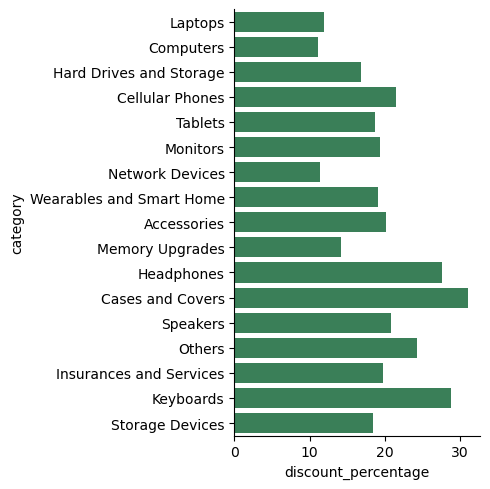

In [8]:
sns.catplot(
    data = categories_discounts,
    kind = "bar",
    y = "category",
    x = "discount_percentage",
    color='seagreen'
);

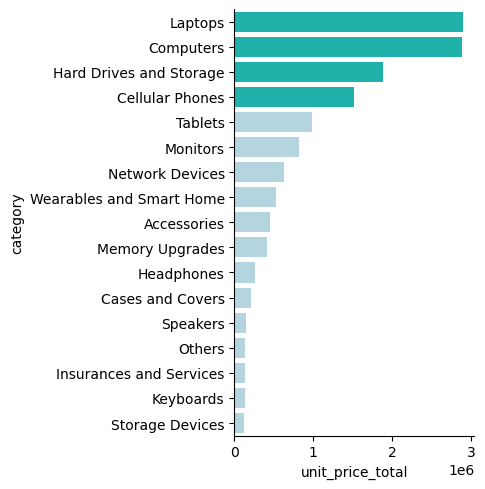

In [95]:
fig_cat_sales = sns.catplot(
    data = categories_discounts,
    kind = "bar",
    y = "category",
    x = "unit_price_total",
    color='lightblue'
)
# Access the Axes of the plot
ax = fig_cat_sales.ax

# Change the color of the first four bars
colors = ['#20B2AA', '#20B2AA', '#20B2AA', '#20B2AA']  # Example colors
for bar, new_color in zip(ax.patches[:4], colors):
    bar.set_facecolor(new_color)
    
fig_cat_sales;

In [96]:
fig_cat_sales.savefig('cat_sales.png');

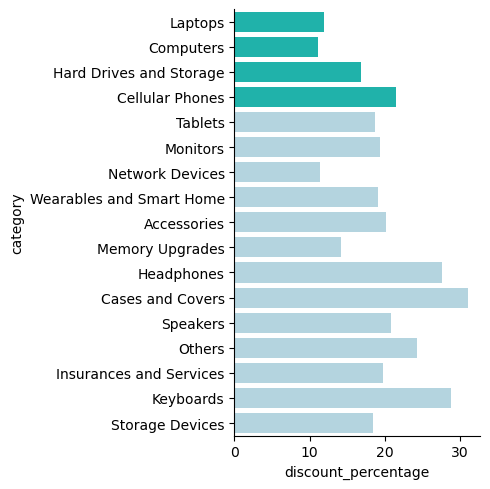

In [97]:
fig_cat_discounts = sns.catplot(
    data = categories_discounts,
    kind = "bar",
    y = "category",
    x = "discount_percentage",
    color='lightblue'
)

# Access the Axes of the plot
ax = fig_cat_discounts.ax

# Change the color of the first four bars
colors = ['#20B2AA', '#20B2AA', '#20B2AA', '#20B2AA']  # Example colors
for bar, new_color in zip(ax.patches[:4], colors):
    bar.set_facecolor(new_color)




fig_cat_discounts;
#sns.catplot(
    #data = categories_discounts,
    #kind = "bar",
    #y = "category",
    #x = "unit_price_total",
    #color='seagreen'
#);

In [98]:
fig_cat_discounts.savefig('cat_discounts.png');

In [11]:
#Looking at refurbished products
categories_discounts_ref = discount_categories_ref_df.groupby('category').agg({'discount':'sum', 'discount_percentage':'mean'}).reset_index().nlargest(30, 'discount_percentage')

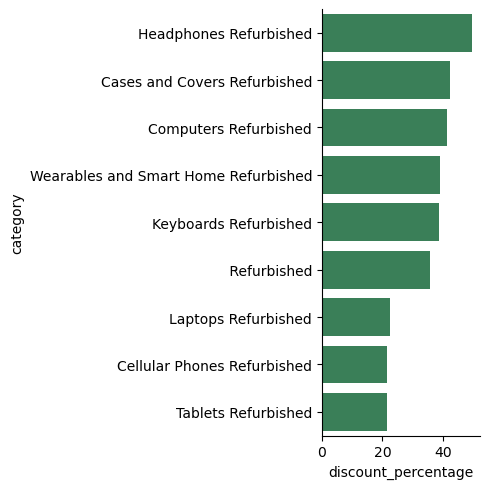

In [12]:
sns.catplot(
    data = categories_discounts_ref,
    kind = "bar",
    y = "category",
    x = "discount_percentage",
    color='seagreen'
);

## All Products - Sales over time

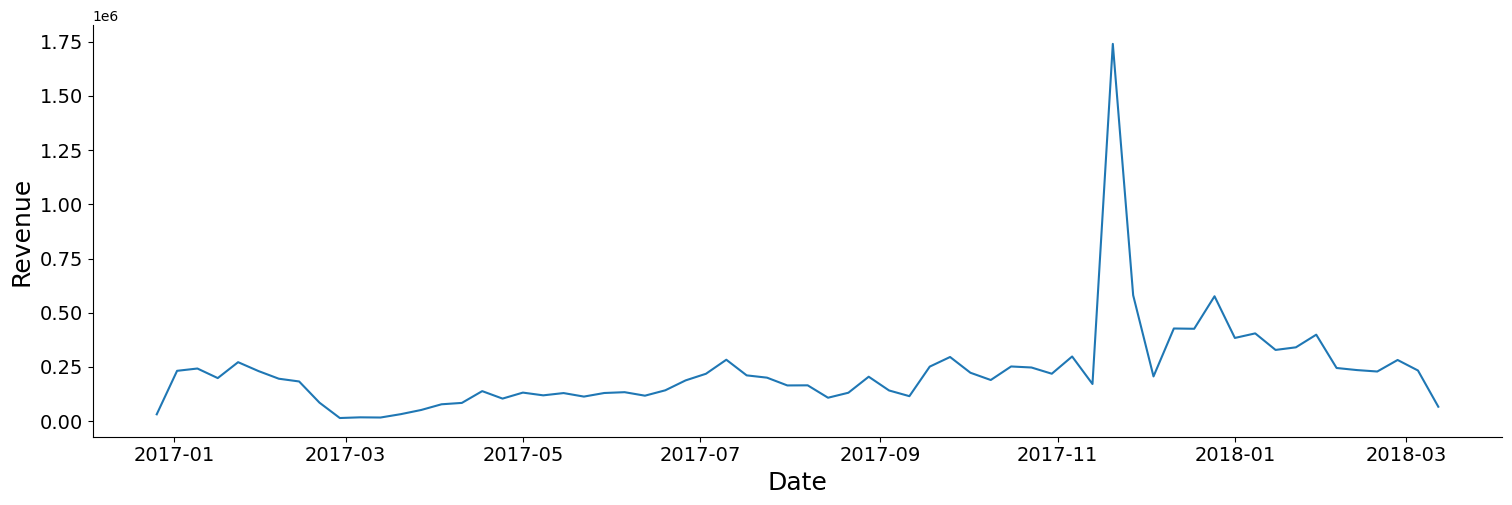

In [76]:
sales_month = discounts_categories_df.groupby(discounts_categories_df['date'].dt.to_period('W'))['unit_price_total'].sum().reset_index()
sales_month

sales_month['date'] = sales_month['date'].dt.to_timestamp()

fig_all_sales = sns.relplot(data=sales_month, kind='line', x='date', y='unit_price_total', aspect=3)
plt.xlabel("Date", fontsize=18),
plt.ylabel("Revenue", fontsize=18),
plt.xticks(fontsize=14),
plt.yticks(fontsize=14);
fig_all_sales;

In [78]:
fig_all_sales.savefig('all_sales.png');

In [60]:
sales_month['unit_price_total'].mean()

228449.13234374998

In [15]:
sales_month.head(3)

,date,unit_price_total
0,2016-12-26,31719.28
1,2017-01-02,232287.94
2,2017-01-09,242882.94


## All Products - Sales in Nov2017

In [16]:
sales_timeperiod = discounts_categories_df[discounts_categories_df['date'].between('2017-11-01', '2017-12-01')]
sales_timeperiod_df = sales_timeperiod.groupby(sales_timeperiod['date'].dt.date)['unit_price_total'].sum().reset_index()
#sns.relplot(data=sales_timeperiod_df, kind='line', x='date', y='unit_price_total', aspect=3);

In [17]:
sales_timeperiod_df.head(3)

,date,unit_price_total
0,2017-11-01,16511.15
1,2017-11-02,42998.94
2,2017-11-03,21364.17


## All new Products - Sales over time

In [18]:
sales_new_month = discount_categories_new_df.groupby(discount_categories_new_df['date'].dt.to_period('W'))['unit_price_total'].sum().reset_index()
sales_new_month

sales_new_month['date'] = sales_new_month['date'].dt.to_timestamp()

#sns.relplot(data=sales_new_month, kind='line', x='date', y='unit_price_total', aspect=3);

## All Products - Average Discounts in Percentage over time

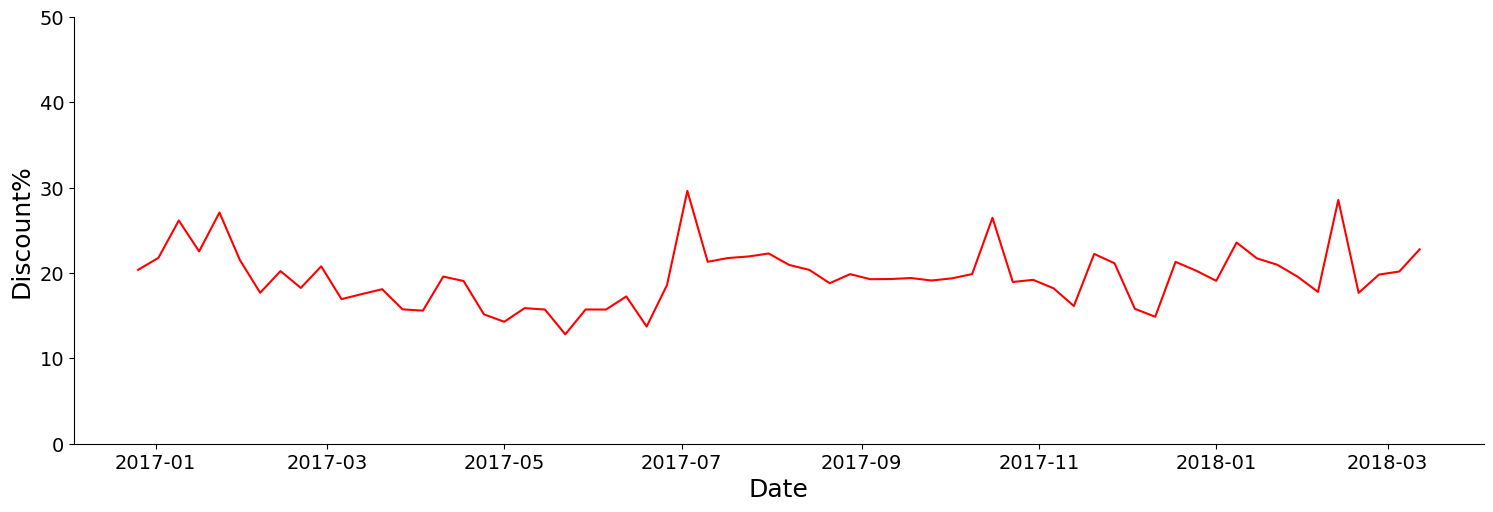

In [79]:
discounts_month = discounts_categories_df.groupby(discounts_categories_df['date'].dt.to_period('W'))['discount_percentage'].mean().reset_index()
discounts_month

discounts_month['date'] = discounts_month['date'].dt.to_timestamp()

fig_all_discounts = sns.relplot(data=discounts_month, kind='line', x='date', y='discount_percentage', color='red', aspect=3)
plt.ylim(0, 50)
plt.xlabel("Date", fontsize=18),
plt.ylabel("Discount%", fontsize=18),
plt.xticks(fontsize=14),
plt.yticks(fontsize=14);
fig_all_discounts;

In [80]:
#Average Discount Rate 
discounts_categories_df['discount'].sum() / (discounts_categories_df['unit_price_total'].sum()) * 100

14.825575841556313

In [81]:
discounts_month['discount_percentage'].mean()

19.586910308516906

In [82]:
fig_all_discounts.savefig('all_discounts.png');

## All Products - Total and average Discounts in Nov2017

In [21]:
#Absolute discounts
discounts_timeperiod = discounts_categories_df[discounts_categories_df['date'].between('2017-11-01', '2017-12-01')]
discounts_timeperiod_df = discounts_timeperiod.groupby(discounts_timeperiod['date'].dt.date)['discount'].sum().reset_index()
#sns.relplot(data=discounts_timeperiod_df, kind='line', x='date', y='discount', aspect=4);

In [22]:
#Calculating mean discounts
avg_discounts_timeperiod = discounts_categories_df[discounts_categories_df['date'].between('2017-11-01', '2017-12-01')]
avg_discounts_timeperiod_df = avg_discounts_timeperiod.groupby(avg_discounts_timeperiod['date'].dt.date).agg({'discount':sum, 'unit_price_total':sum})

avg_discounts_timeperiod_df['discount%'] = (avg_discounts_timeperiod_df['discount'] / avg_discounts_timeperiod_df['unit_price_total'])*100
#avg_discounts_timeperiod_df

#sns.relplot(data=avg_discounts_timeperiod_df, kind='line', x='date', y='discount%', aspect=3);

In [23]:
#Using mean for showing mean discounts
discounts_timeperiod = discounts_categories_df[discounts_categories_df['date'].between('2017-11-01', '2017-12-01')]
discounts_timeperiod['date'] = pd.to_datetime(discounts_timeperiod['date'])
discounts_timeperiod_df = discounts_timeperiod.groupby(discounts_timeperiod['date'].dt.date)['discount_percentage'].mean().reset_index()
#discounts_timeperiod_df

#sns.relplot(data=discounts_timeperiod_df, kind='line', x='date', y='discount_percentage', aspect=3);

In [24]:
#Using median for showing mean discounts
discounts_timeperiod = discounts_categories_df[discounts_categories_df['date'].between('2017-11-01', '2017-12-01')]
discounts_timeperiod['date'] = pd.to_datetime(discounts_timeperiod['date'])
discounts_median_timeperiod_df = discounts_timeperiod.groupby(discounts_timeperiod['date'].dt.date)['discount_percentage'].median().reset_index()
#discounts_median_timeperiod_df

#sns.relplot(data=discounts_median_timeperiod_df, kind='line', x='date', y='discount_percentage', aspect=3);

## All new Products - Average Discounts in Percentage over time

In [25]:
discounts_new_month = discount_categories_new_df.groupby(discount_categories_new_df['date'].dt.to_period('W'))['discount_percentage'].mean().reset_index()
discounts_new_month

discounts_new_month['date'] = discounts_new_month['date'].dt.to_timestamp()

#sns.relplot(data=discounts_new_month, kind='line', x='date', y='discount_percentage', aspect=3);

## All Products - Product Quantities over time

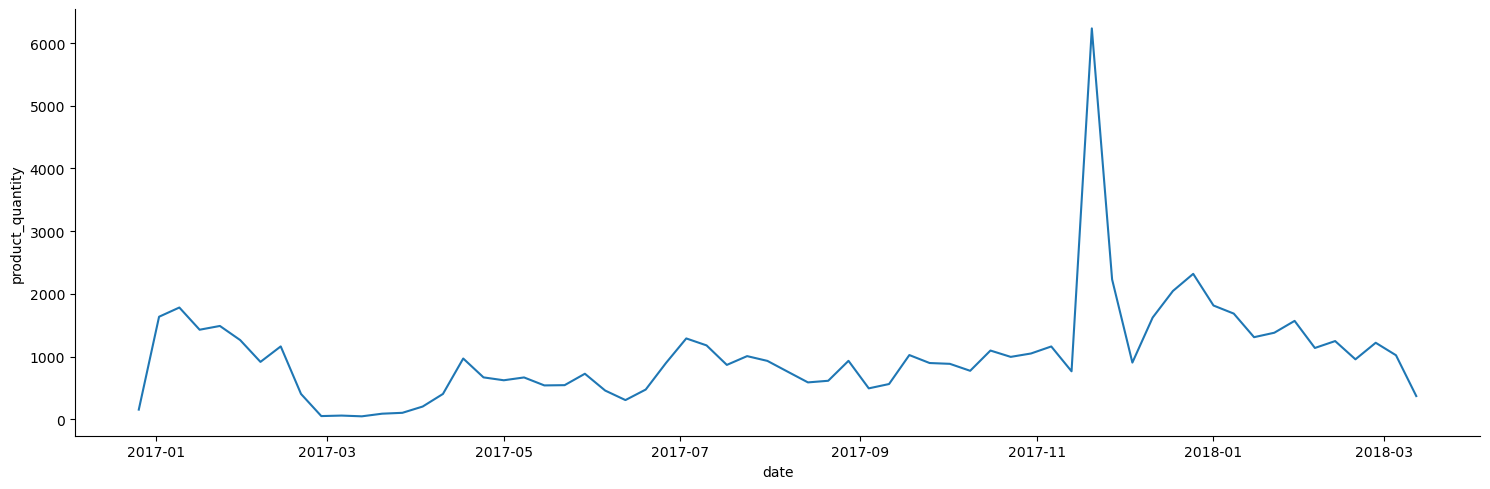

In [26]:
quantities_month = discounts_categories_df.groupby(discounts_categories_df['date'].dt.to_period('W'))['product_quantity'].sum().reset_index()
quantities_month

quantities_month['date'] = quantities_month['date'].dt.to_timestamp()

fig_all_quantities = sns.relplot(data=quantities_month, kind='line', x='date', y='product_quantity', aspect=3)
fig_all_quantities;

In [27]:
fig_all_quantities.savefig('all_quantities.png');

## All Products - Product Quantities from Nov2017

In [28]:
quantities_timeperiod = discounts_categories_df[discounts_categories_df['date'].between('2017-11-01', '2017-12-01')]
quantities_timeperiod_df = quantities_timeperiod.groupby(quantities_timeperiod['date'].dt.date)['product_quantity'].sum().reset_index()
#sns.relplot(data=quantities_timeperiod_df, kind='line', x='date', y='product_quantity', aspect=3);

## All new Products - Product Quantities over time

In [29]:
quantities_new_month = discount_categories_new_df.groupby(discount_categories_new_df['date'].dt.to_period('W'))['product_quantity'].sum().reset_index()
quantities_new_month

quantities_new_month['date'] = quantities_new_month['date'].dt.to_timestamp()

#sns.relplot(data=quantities_new_month, kind='line', x='date', y='product_quantity', aspect=3);

# All Products - Charts for sales, discounts and product quantities over time

In [30]:
#sns.relplot(data=sales_month, kind='line', x='date', y='unit_price_total', aspect=3)
#sns.relplot(data=discounts_month, kind='line', x='date', y='discount_percentage', aspect=3)
#plt.ylim(0, 50)
#sns.relplot(data=quantities_month, kind='line', x='date', y='product_quantity', aspect=3);

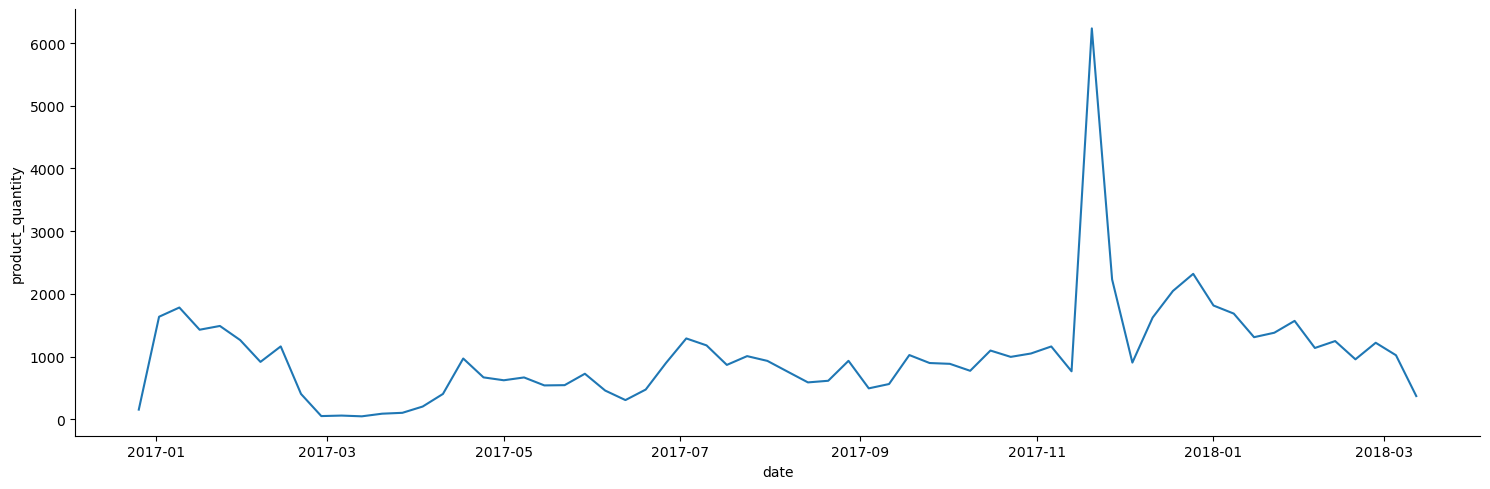

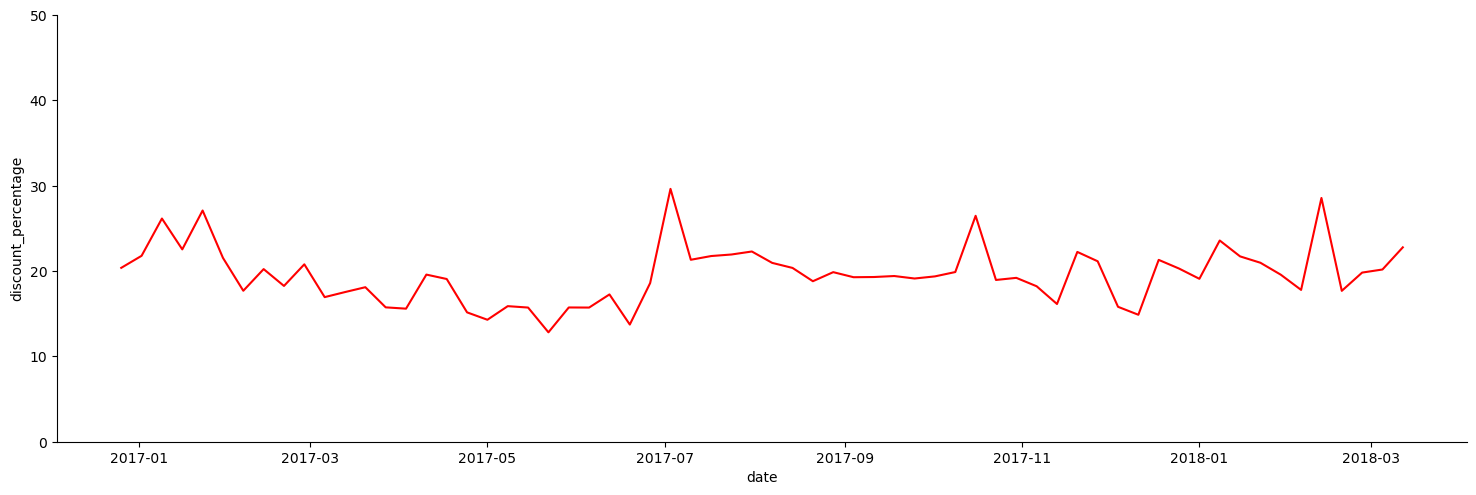

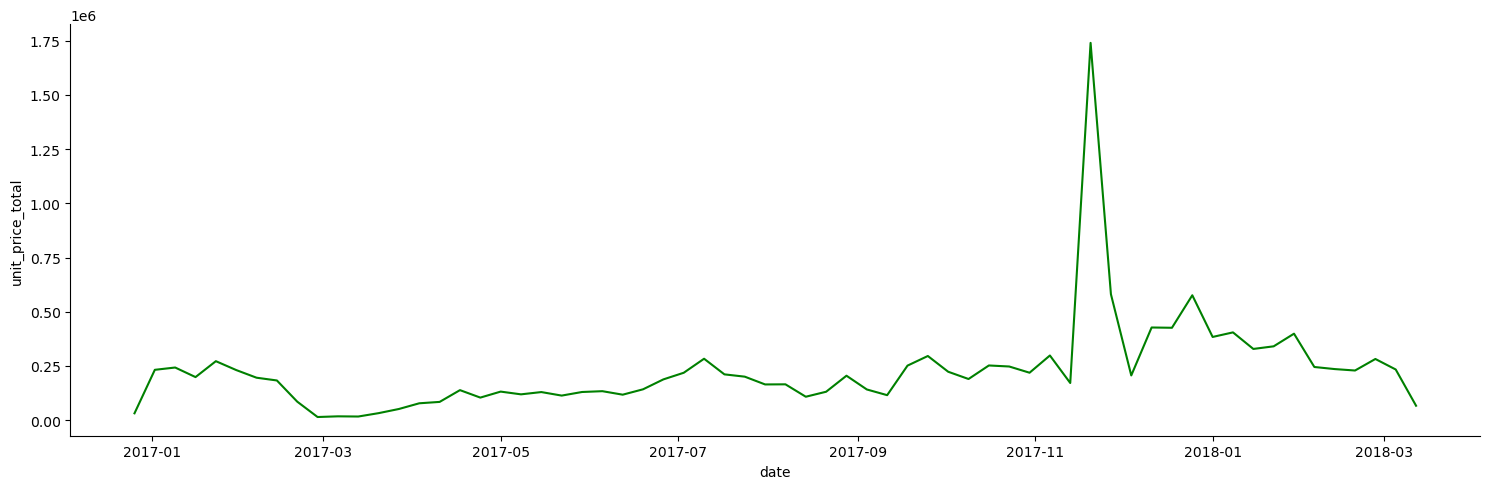

In [31]:
sns.relplot(
    kind='line',
    data=quantities_month,
    x='date',
    y='product_quantity',
    aspect=3
)
sns.relplot(
    kind='line',
    data=discounts_month,
    x='date',
    y='discount_percentage',
    color='red', 
    aspect=3
)
plt.ylim(0, 50)
sns.relplot(
    kind='line',
    data=sales_month,
    x='date',
    y='unit_price_total',
    color='green',
    aspect=3
);

## Charts for sales, discounts and product quantities for November 2017

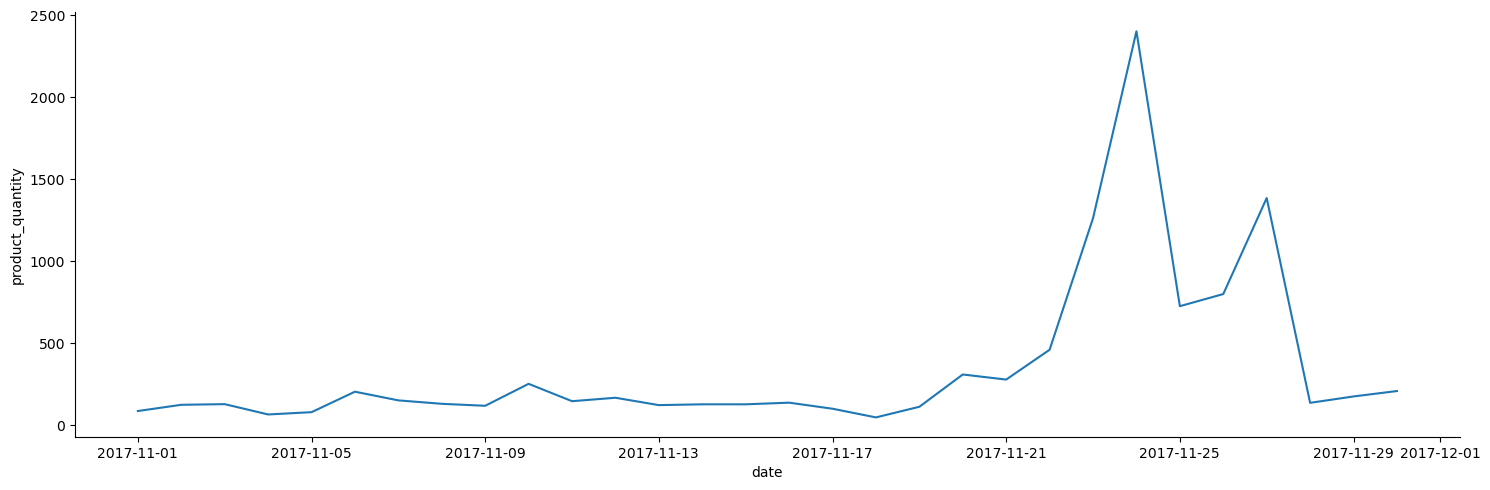

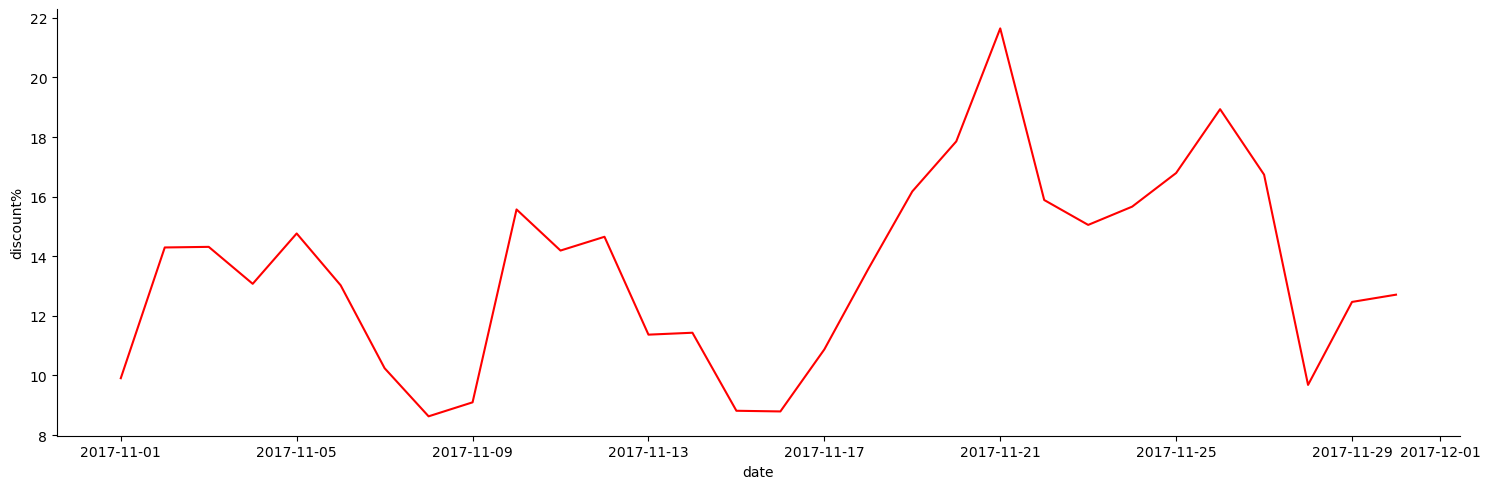

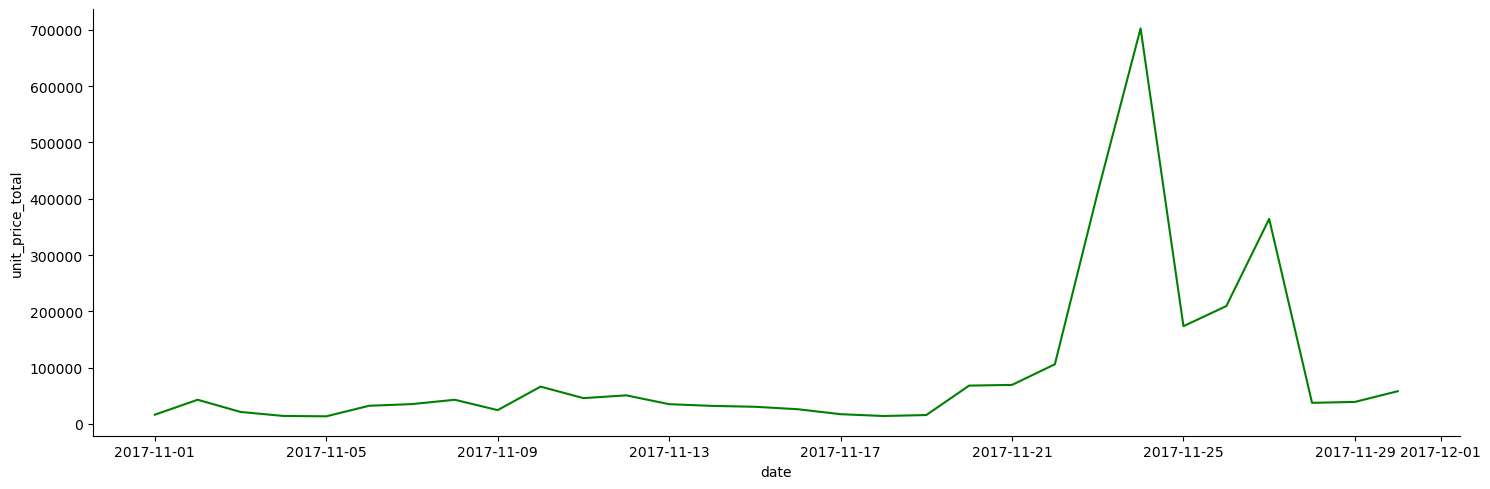

In [32]:
sns.relplot(
    kind='line',
    data=quantities_timeperiod_df,
    x='date',
    y='product_quantity',
    aspect=3
)
sns.relplot(
    kind='line',
    data=avg_discounts_timeperiod_df,
    x='date',
    y='discount%',
    color='red', 
    aspect=3
)
sns.relplot(
    kind='line',
    data=sales_timeperiod_df,
    x='date',
    y='unit_price_total',
    color='green',
    aspect=3
);

### New Products

In [33]:
#sns.relplot(data=sales_new_month, kind='line', x='date', y='unit_price_total', aspect=3)
#sns.relplot(data=discounts_new_month, kind='line', x='date', y='discount_percentage', aspect=3)
#plt.ylim(0, 50)
#sns.relplot(data=quantities_new_month, kind='line', x='date', y='product_quantity', aspect=3);

## Top 10 products in Quantity

In [34]:
#discounts_categories_df.head(3)

In [35]:
top10_products_quantity = discounts_categories_df.groupby('sku')['product_quantity'].sum().reset_index().nlargest(10, 'product_quantity')

In [36]:
list_top10_products_quantity = top10_products_quantity.merge(
    products_qual,
    how='left',
    on='sku'
)

#list_top10_products_quantity

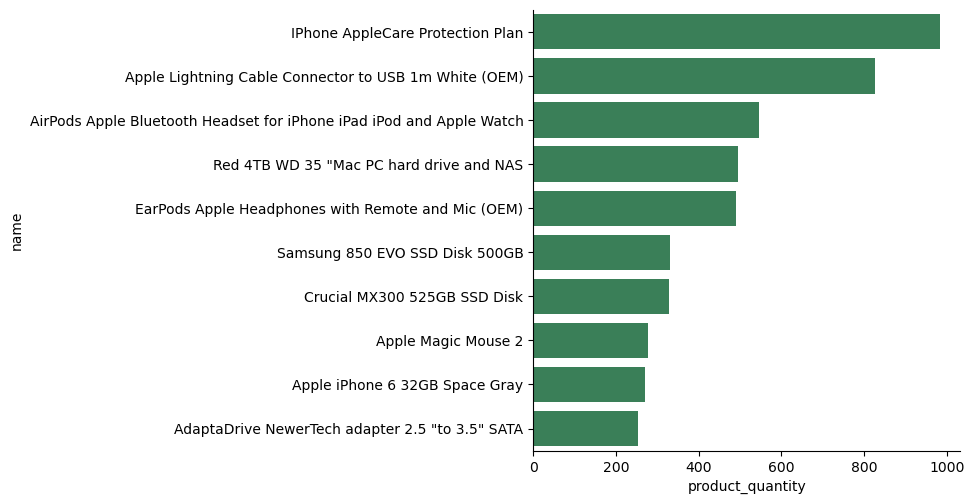

In [37]:
sns.catplot(
    data = list_top10_products_quantity,
    kind = "bar",
    y = "name",
    x = "product_quantity",
    color='seagreen'
);

In [38]:
top10_products_quantity_df = top10_products_quantity.merge(
    discounts_categories_df,
    how='left',
    on='sku'
)

#top10_products_quantity_df.head(3)

## Top 10 products in Sales

In [39]:
top10_products_sales = discounts_categories_df.groupby('sku').agg({'unit_price_total':'sum', 'discount_percentage':'mean'}).reset_index()
top10_products_sales = top10_products_sales.sort_values(by='unit_price_total', ascending=False).head(10)
top10_products_sales

,sku,unit_price_total,discount_percentage
920,APP2075,212411.11,8.22
919,APP2074,153884.97,8.67
2760,LGE0044,138237.79,5.26
1148,APP2489,130131.00,1.55
915,APP2072,129397.08,10.63
4188,PAC2136,126672.95,9.67
917,APP2073,121385.77,9.63
937,APP2089,113149.65,7.33
848,APP1956,105459.33,33.47
1117,APP2446,104941.86,13.57


In [40]:
top10_products_sales_df = top10_products_sales.merge(
    discounts_categories_df,
    how='left',
    on='sku'
)

top10_products_sales_df.head(3)

,sku,unit_price_total_x,discount_percentage_x,id_order,date,name,desc,type,unit_price,price,...,unit_price_total_y,discount,discount_percentage_y,price_group,discount_group,order_year,order_month,order_day,brand_name,category
0,APP2075,212411.11,8.22,369677,2017-06-27 20:45:32,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,"1,02E+12",3134.00,3305.59,...,3134.00,171.59,5.00,-5000.00,5-10,2017,6,27,Apple,Laptops
1,APP2075,212411.11,8.22,372616,2017-07-04 18:34:58,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,"1,02E+12",3099.00,3305.59,...,3099.00,206.59,6.00,-5000.00,5-10,2017,7,4,Apple,Laptops
2,APP2075,212411.11,8.22,373232,2017-07-05 17:12:18,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,"1,02E+12",3099.00,3305.59,...,3099.00,206.59,6.00,-5000.00,5-10,2017,7,5,Apple,Laptops


In [41]:
# Create a new column 'name_short' with the first three words of 'name'
discounts_categories_df['name_short'] = discounts_categories_df['name'].apply(
    lambda x: ' '.join(x.split()[:4]) if pd.notnull(x) else x
)

discounts_categories_shortname_df = discounts_categories_df[['sku', 'name_short']]
discounts_categories_shortname_df

,sku,name_short
0,LAC0212,LaCie Porsche Design Desktop
1,PAR0074,Parrot 550mAh battery for
2,OWC0074,Mac OWC Memory 8GB
3,TAD0007,Tado Smart Climate Control
4,PAC1561,Macally External Hard Drive
...,...,...
57969,APP0927,EarPods Apple Headphones with
57970,APP0698,Apple Lightning Cable Connector
57971,APP0698,Apple Lightning Cable Connector
57972,APP0698,Apple Lightning Cable Connector


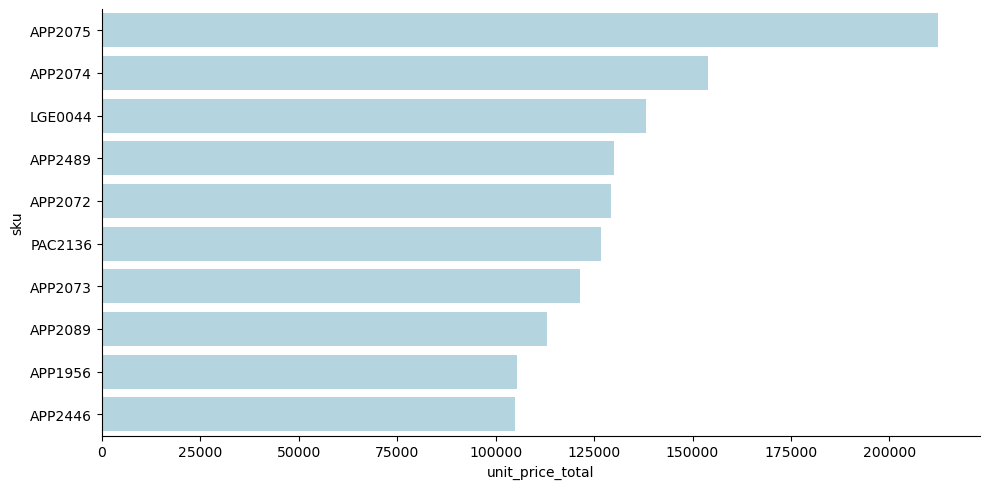

In [42]:
sns.catplot(
    data = top10_products_sales,
    kind = "bar",
    y = "sku",
    x = "unit_price_total",
    color="lightblue",
    aspect=2
);

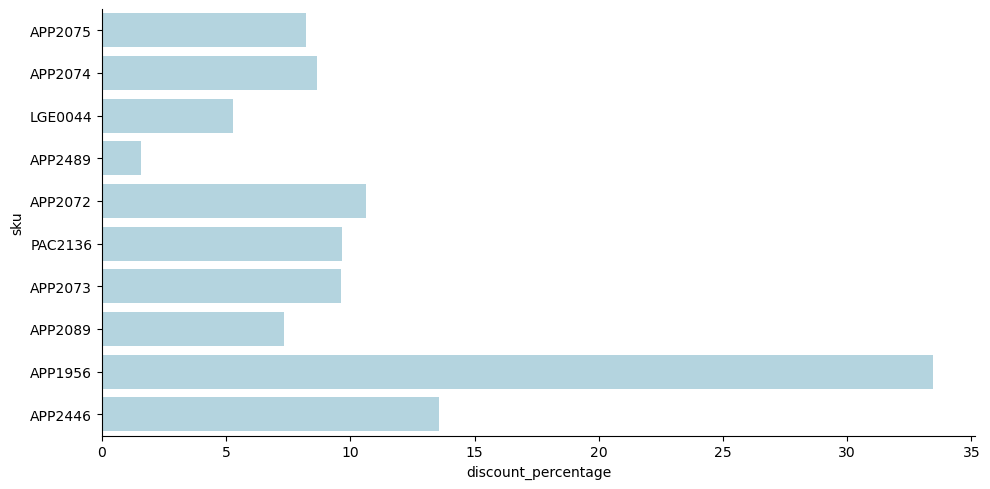

In [43]:
sns.catplot(
    data = top10_products_sales,
    kind = "bar",
    y = "sku",
    x = "discount_percentage",
    color="lightblue",
    aspect=2
);

In [44]:
top10_products_sales['unit_price_total'].sum()

1335671.5100000002

In [45]:
discounts_categories_df['unit_price_total'].sum()

14620744.469999997

In [46]:
# 1.335.671 / 14.620.744 = 9%
#9% of all sales are made with the TOP 10 products

## TOP 10 Products (revenue) - Sales over time

In [47]:
top10_products_sales_df.head(3)

,sku,unit_price_total_x,discount_percentage_x,id_order,date,name,desc,type,unit_price,price,...,unit_price_total_y,discount,discount_percentage_y,price_group,discount_group,order_year,order_month,order_day,brand_name,category
0,APP2075,212411.11,8.22,369677,2017-06-27 20:45:32,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,"1,02E+12",3134.00,3305.59,...,3134.00,171.59,5.00,-5000.00,5-10,2017,6,27,Apple,Laptops
1,APP2075,212411.11,8.22,372616,2017-07-04 18:34:58,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,"1,02E+12",3099.00,3305.59,...,3099.00,206.59,6.00,-5000.00,5-10,2017,7,4,Apple,Laptops
2,APP2075,212411.11,8.22,373232,2017-07-05 17:12:18,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,"1,02E+12",3099.00,3305.59,...,3099.00,206.59,6.00,-5000.00,5-10,2017,7,5,Apple,Laptops


In [48]:
top10_products_sales_df['date'] = pd.to_datetime(top10_products_sales_df['date'])

top10_weekly_sales = top10_products_sales_df.groupby(top10_products_sales_df['date'].dt.date)['unit_price_total_x'].sum().reset_index()
top10_weekly_sales.head()


,date,unit_price_total_x
0,2017-01-05,138237.79
1,2017-01-08,138237.79
2,2017-01-09,414713.37
3,2017-01-10,552951.16
4,2017-01-12,276475.58


## TOP 10 Products (revenue) - Average Discounts in Percentage over time

In [49]:
TOP10_avg_discounts_month = top10_products_sales_df.groupby(top10_products_sales_df['date'].dt.to_period('W'))['discount_percentage'].mean().reset_index()

TOP10_avg_discounts_month['date'] = TOP10_avg_discounts_month['date'].dt.to_timestamp()

#sns.relplot(data=TOP10_avg_discounts_month, kind='line', x='date', y='discount_percentage', aspect=3);

KeyError: 'Column not found: discount_percentage'

## TOP 10 Products (revenue) - Product quantities over time

In [ ]:
TOP10_quantities_month = top10_products_sales_df.groupby(top10_products_sales_df['date'].dt.to_period('W'))['product_quantity'].sum().reset_index()
TOP10_quantities_month

TOP10_quantities_month['date'] = TOP10_quantities_month['date'].dt.to_timestamp()

#sns.relplot(data=quantities_month, kind='line', x='date', y='product_quantity', aspect=3);

## TOP 10 Products (revenue) - Total Discounts over time

In [ ]:
#TOP10_discounts_month = top10_products_sales_df.groupby(top10_products_sales_df['date'].dt.to_period('W'))['discount'].sum().reset_index()
#TOP10_discounts_month

#TOP10_discounts_month['date'] = TOP10_discounts_month['date'].dt.to_timestamp()

#sns.relplot(data=TOP10_discounts_month, kind='line', x='date', y='discount', aspect=3);

In [ ]:
#sns.relplot(data=TOP10_sales_month, kind='line', x='date', y='unit_price_total_y', aspect=3)
#sns.relplot(data=TOP10_quantities_month, kind='line', x='date', y='product_quantity', aspect=3)
#sns.relplot(data=TOP10_avg_discounts_month, kind='line', x='date', y='discount_percentage', aspect=3)
#plt.ylim(0, 50)
#sns.relplot(data=TOP10_discounts_month, kind='line', x='date', y='discount', aspect=3);

In [ ]:
sns.relplot(
    kind='line',
    data=TOP10_quantities_month,
    x='date',
    y='product_quantity',
    aspect=4
)
sns.relplot(
    data=TOP10_avg_discounts_month,
    x='date',
    y='discount_percentage',
    kind='line',
    color='red',
    aspect=4
)
sns.relplot(
    kind='line',
    data=TOP10_sales_month,
    x='date',
    y='unit_price_total_y',
    color='green',
    aspect=4
);

In [ ]:
TOP10_combined_df = pd.merge(TOP10_sales_month, TOP10_discounts_month, on='date', how='outer')
#TOP10_combined_df

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=TOP10_combined_df, x='date', y='unit_price_total_y', label='Unit Price Total')
sns.lineplot(data=TOP10_combined_df, x='date', y='discount', label='Discount');

## TOP Seller APP2075

In [ ]:
#APP2075_df = discounts_categories_df.loc[discounts_categories_df['sku'] == 'APP2075']

In [ ]:
#APP2075_month = APP2075_df.groupby(APP2075_df['date'].dt.to_period('M')).agg({'unit_price_total':'sum', 'discount':'mean'}).reset_index()
#APP2075_month['date'] = APP2075_month['date'].dt.to_timestamp()
#APP2075_month

In [ ]:
#plt.figure(figsize=(15, 6))
#sns.lineplot(data=APP2075_month, x='date', y='unit_price_total', label='Unit Price Total')
#sns.lineplot(data=APP2075_month, x='date', y='discount', label='Discount');

## Looking at TOP10 Products with high discounts

In [ ]:
#top10_products_sales_df.groupby('sku')['discount_percentage'].mean().nlargest(3)

In [ ]:
#APP1956_df = discounts_categories_df.loc[discounts_categories_df['sku'] == 'APP1956']
#APP1956_df_day = APP1956_df.groupby(APP1956_df['date'].dt.date).agg({'product_quantity':'sum', 'discount_percentage':'mean'}).reset_index()
#APP1956_df_day

In [ ]:
#plt.figure(figsize=(15, 6))
#sns.lineplot(data=APP1956_df_day, x='date', y='product_quantity')
#sns.lineplot(data=APP1956_df_day, x='date', y='discount_percentage');

## All Products - Examine Correlation between Discounts and Sales

In [ ]:
#discounts_categories_df_week = discounts_categories_df.groupby(discounts_categories_df['date'].dt.to_period('W'))['discount_percentage'].mean().reset_index()
#discounts_categories_df_week.head(3)

#discounts_categories_df_week['date'] = discounts_categories_df_week['date'].dt.to_timestamp()

In [ ]:
#sns.relplot(
    #data=discounts_categories_df_week,
    #y='discount_percentage',
    #x='date',
    #height=10,
    #aspect=2
#);

# Compare a product/product group with changing discounts over time

In [ ]:
#savefig('./conten_class.svg')